In [38]:
# Import data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# ############LOADING DATASET #########################

data_folder = "data"
dataset = "credit_train"
file_type = ".csv"

df = pd.read_csv(data_folder + "/" + dataset + file_type)

In [39]:
# define already build functions
# removing string data from column to make it float type
mapping_dict = {'8 years': 8, '10+ years': 10, '3 years': 3, '5 years': 5, '< 1 year': 0, '2 years': 2,
                '4 years': 4, '9 years': 9, '7 years': 7, '1 year': 1, '6 years': 6, 'n/a': np.nan}


def f(x):
    try:
        return mapping_dict[x]
    except:
        return x
    
# Finding the median value in the respective columns
def cs(i):
    if i > 1000:
        i = i / 10
        return (i)
    else:
        return (i)


# adding monthly income
def mi(row):
    ai = row["Annual Income"]
    md = row["Monthly Debt"]

    miv = ai / 12 - md
    return miv

# adding CreditRatio as new feature
def cr(row):
    cla = row["Current Loan Amount"]
    ai = row["Annual Income"]
    return cla / ai

In [40]:
# Prepare data
# removing unwanted features like LOanID and CustomerID
df = df.drop(df[['Loan ID', 'Customer ID']], axis=1)

# Drop record if it does not have at least 'n' values that are **not** NaN out of 17 columns
# finding val of 'n', we will see how many records are dropped at each threshlod val
for i in range(1, 18):
    mod_df = df.dropna(thresh=i)
    total_rows = mod_df.shape[0]
    print('With threshold value {0} the no. of records are {1}'.format(i, total_rows))

# thresh12-10000, thresh=13-99999, thresh=14-99k, thresh=15-89k, thresh=16-79k, thresh=17-36.5k
df = df.dropna(thresh=17)

With threshold value 1 the no. of records are 100000
With threshold value 2 the no. of records are 100000
With threshold value 3 the no. of records are 100000
With threshold value 4 the no. of records are 100000
With threshold value 5 the no. of records are 100000
With threshold value 6 the no. of records are 100000
With threshold value 7 the no. of records are 100000
With threshold value 8 the no. of records are 100000
With threshold value 9 the no. of records are 100000
With threshold value 10 the no. of records are 100000
With threshold value 11 the no. of records are 100000
With threshold value 12 the no. of records are 100000
With threshold value 13 the no. of records are 99999
With threshold value 14 the no. of records are 99578
With threshold value 15 the no. of records are 89098
With threshold value 16 the no. of records are 79015
With threshold value 17 the no. of records are 36423


In [41]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [42]:
# Apply functions
df['Years in current job'] = df['Years in current job'].apply(f).astype(np.float64)
df['Credit Score'] = df['Credit Score'].apply(cs)

# #fill NaN values groupby more related column
df['Credit Score'].fillna(value=df.groupby('Home Ownership')['Credit Score'].transform('median'), inplace=True)
df['Annual Income'].fillna(value=df.groupby('Purpose')['Annual Income'].transform('median'), inplace=True)
df['Years in current job'].fillna(value=df.groupby('Home Ownership')['Years in current job'].transform('median'),
                                  inplace=True)
df['Months since last delinquent'].fillna(0, inplace=True)
df['Maximum Open Credit'].fillna(value=df.groupby('Home Ownership')['Maximum Open Credit'].transform('median'),
                                 inplace=True)
df['Bankruptcies'].fillna(0, inplace=True)
df['Tax Liens'].fillna(0, inplace=True)

df["Monthly Income"] = df.apply(lambda row: mi(row), axis=1)
df["Credit Ration per Year"]= df.apply(lambda row: cr(row), axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 19 columns):
Loan Status                     36423 non-null object
Current Loan Amount             36423 non-null float64
Term                            36423 non-null object
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens      

In [43]:
# Take a look at the outcome variable: Loan Status
print(df['Loan Status'].value_counts())

Fully Paid     28972
Charged Off     7451
Name: Loan Status, dtype: int64


In [44]:
# Assign outcome as '0' if Loan is paid and as '1' if Loan is cahrged off

df['Loan Status'] = [0 if x == 'Fully Paid' else 1 for x in  df['Loan Status']]

In [45]:
# encode features
label_encoder = preprocessing.LabelEncoder()
df['Loan Status'] = df['Loan Status'].astype(np.str)
df['Loan Status'] = label_encoder.fit_transform(df['Loan Status']).astype(np.float64)

label_encoder1 = preprocessing.LabelEncoder()
df['Term'] = label_encoder1.fit_transform(df['Term']).astype(np.float64)

encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(df[['Home Ownership', 'Purpose']]).toarray(),
                       columns=encoder.get_feature_names(['Home Ownership', 'Purpose']))
encoded.info()
#df = df.drop(df[['Home Ownership', 'Purpose']], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 20 columns):
Home Ownership_HaveMortgage     36423 non-null float64
Home Ownership_Home Mortgage    36423 non-null float64
Home Ownership_Own Home         36423 non-null float64
Home Ownership_Rent             36423 non-null float64
Purpose_Business Loan           36423 non-null float64
Purpose_Buy House               36423 non-null float64
Purpose_Buy a Car               36423 non-null float64
Purpose_Debt Consolidation      36423 non-null float64
Purpose_Educational Expenses    36423 non-null float64
Purpose_Home Improvements       36423 non-null float64
Purpose_Medical Bills           36423 non-null float64
Purpose_Other                   36423 non-null float64
Purpose_Take a Trip             36423 non-null float64
Purpose_major_purchase          36423 non-null float64
Purpose_moving                  36423 non-null float64
Purpose_other                   36423 non-null float64
Purpose_ren

In [46]:
# merging categorical encoded dataframe with the main dataframe and deleting unwanted features
df = df.reset_index(drop=True).merge(encoded.reset_index(drop=True), left_index=True, right_index=True)

# remove it from the dataframe so it only contains the features that our model should use
df = df.drop(df[['Home Ownership', 'Purpose']], axis=1)

In [47]:
df.head(10)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.0,99999999.0,1.0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,217646.0,1.0,730.0,1184194.0,0.0,10855.08,19.6,10.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,548746.0,1.0,678.0,2559110.0,2.0,18660.28,22.6,33.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,99999999.0,1.0,728.0,714628.0,3.0,11851.06,16.0,76.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,99999999.0,1.0,740.0,776188.0,0.0,11578.22,8.5,25.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,234124.0,1.0,727.0,693234.0,10.0,14211.24,24.7,46.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,666204.0,0.0,723.0,1821967.0,10.0,17612.24,22.0,34.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,317108.0,0.0,687.0,1133274.0,8.0,9632.81,17.4,53.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,465410.0,0.0,688.0,1722654.0,3.0,15647.45,22.3,30.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,99999999.0,1.0,746.0,1749748.0,10.0,19247.19,20.0,32.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 37 columns):
Loan Status                     36423 non-null float64
Current Loan Amount             36423 non-null float64
Term                            36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens                       36423 non-null float64
Monthly Income                  36423 non-null float64
Credit Rati

In [ ]:
# show correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

# Basic Cleaning

In [50]:
#Decide which categorical variables you want to use in model

for col_name in df.columns:
        unique_cat = len(df[col_name].unique())
        print("Feature {0} has {1} unique categories".format(col_name, unique_cat))

Feature Loan Status has 2 unique categories
Feature Current Loan Amount has 13914 unique categories
Feature Term has 2 unique categories
Feature Credit Score has 167 unique categories
Feature Annual Income has 20645 unique categories
Feature Years in current job has 11 unique categories
Feature Monthly Debt has 27103 unique categories
Feature Years of Credit History has 452 unique categories
Feature Months since last delinquent has 108 unique categories
Feature Number of Open Accounts has 46 unique categories
Feature Number of Credit Problems has 11 unique categories
Feature Current Credit Balance has 18486 unique categories
Feature Maximum Open Credit has 22109 unique categories
Feature Bankruptcies has 8 unique categories
Feature Tax Liens has 10 unique categories
Feature Monthly Income has 29269 unique categories
Feature Credit Ration per Year has 27196 unique categories
Feature Home Ownership_HaveMortgage has 2 unique categories
Feature Home Ownership_Home Mortgage has 2 unique cat

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 37 columns):
Loan Status                     36423 non-null float64
Current Loan Amount             36423 non-null float64
Term                            36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens                       36423 non-null float64
Monthly Income                  36423 non-null float64
Credit Rati

In [52]:
from sklearn.neighbors.kde import KernelDensity
def kde_sklearn(x, bandwidth=0.2, **kwargs):
    x_grid = np.linspace(x.min() - 1, x.max() + 1, 500)
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf), x_grid

In [53]:
def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 -q1
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    
    outlier_indices = list(x.index[(x<floor) | (x>ceiling)])
    return outlier_indices

In [54]:
tukey_indices = find_outliers_tukey(df['Annual Income'])

In [55]:
pdf, grid = kde_sklearn(np.asarray(tukey_indices))

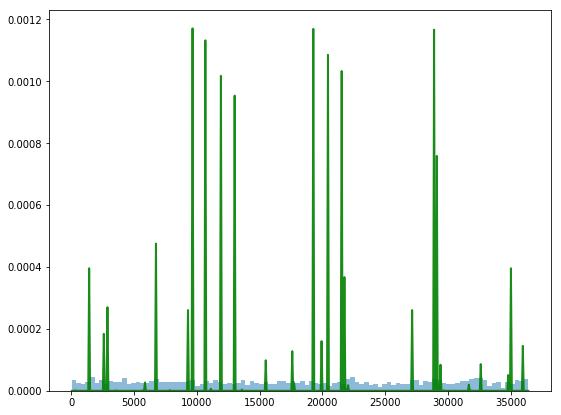

In [56]:
fig, ax2 = plt.subplots(figsize = (9,7))

#Plot histogram
ax2.hist(tukey_indices, bins = 100, alpha = 0.5, density = True)
ax2.plot(grid, pdf, alpha = 0.9, color = 'green', linewidth = 2.0)
plt.show()

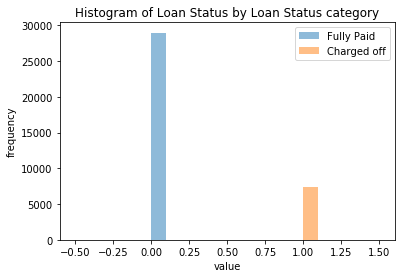

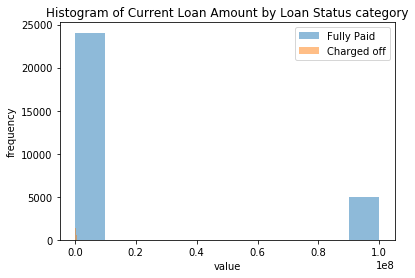

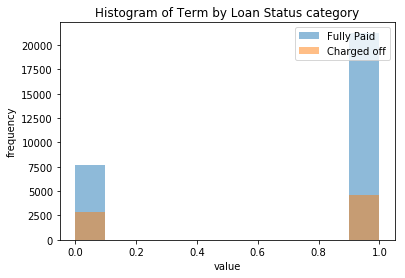

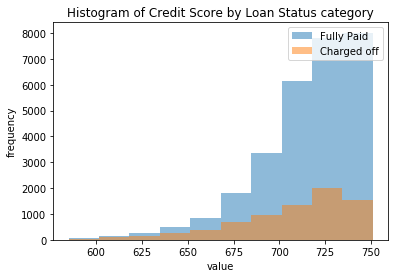

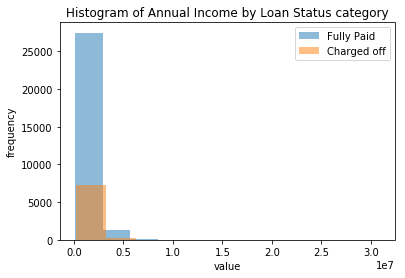

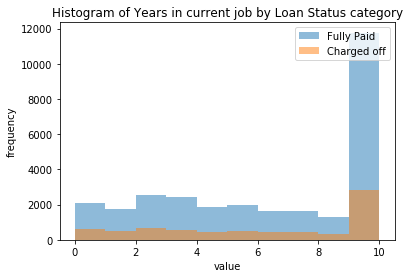

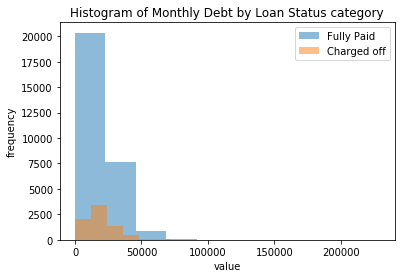

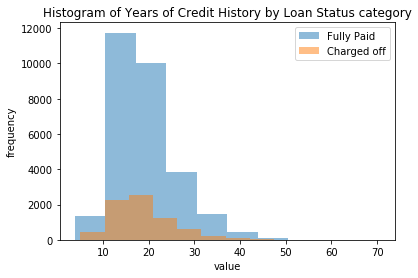

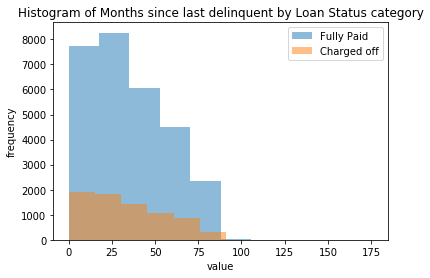

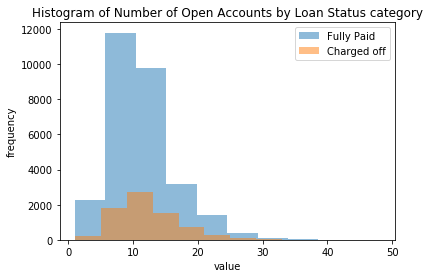

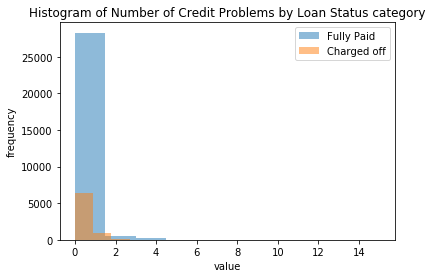

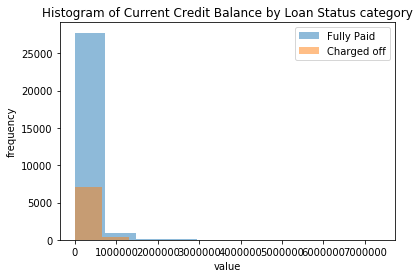

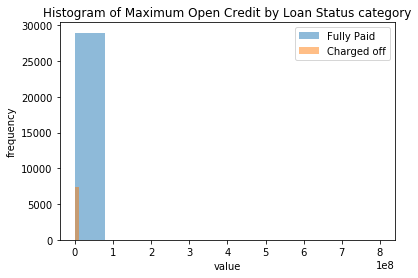

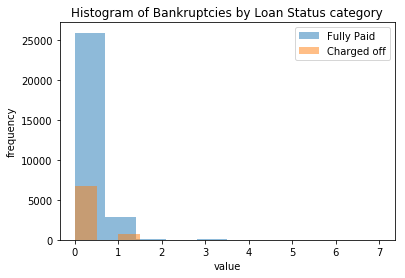

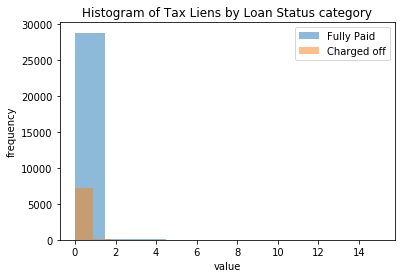

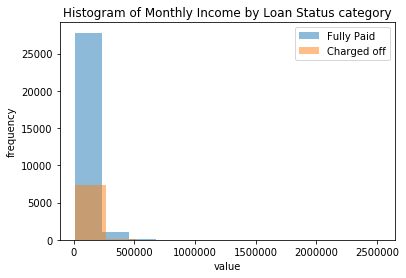

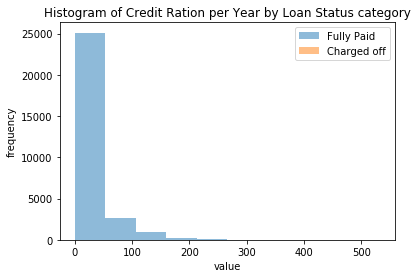

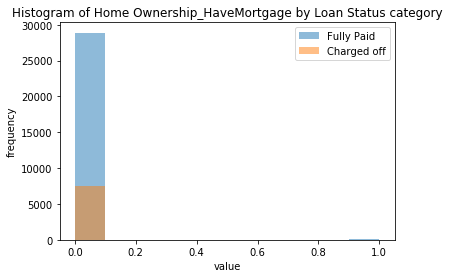

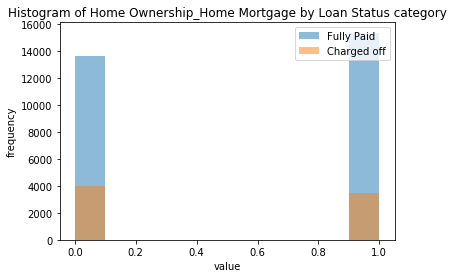

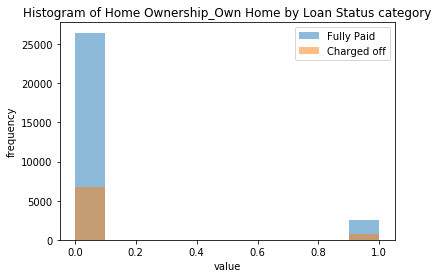

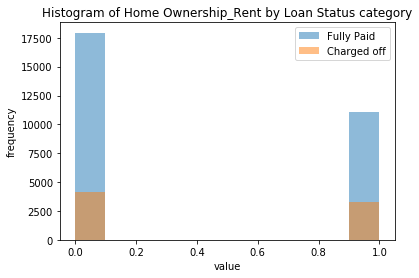

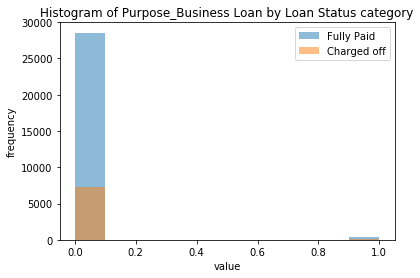

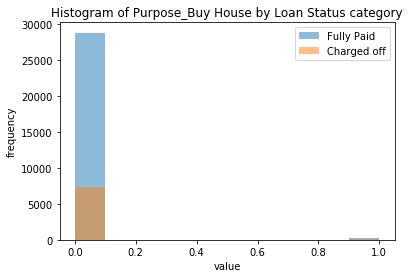

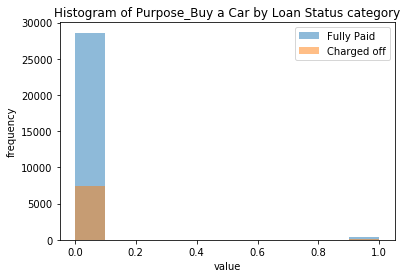

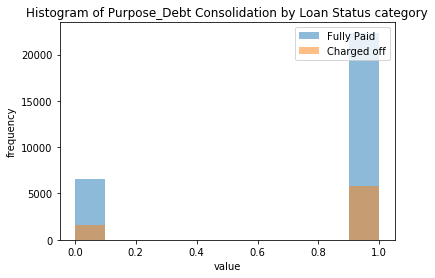

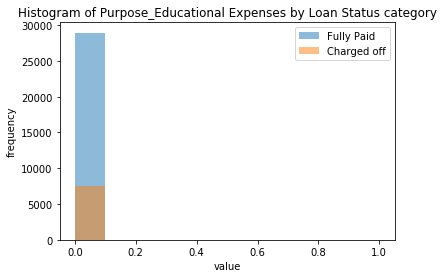

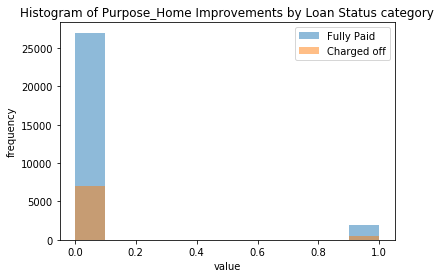

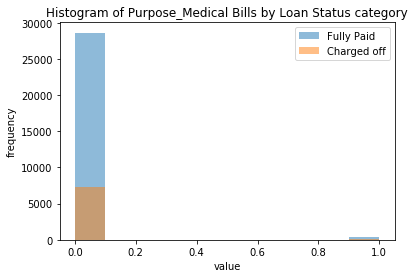

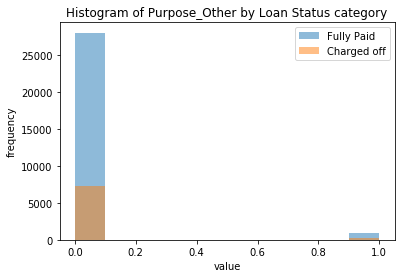

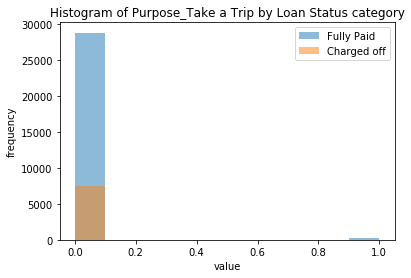

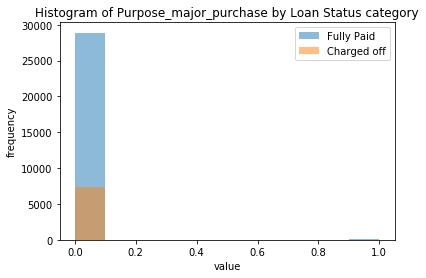

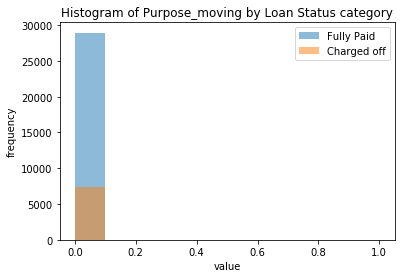

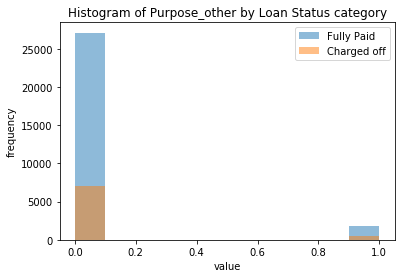

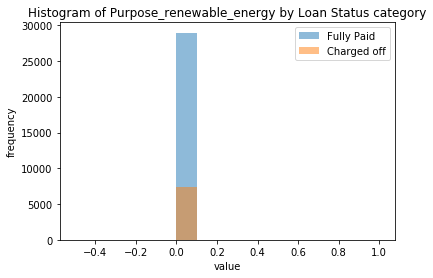

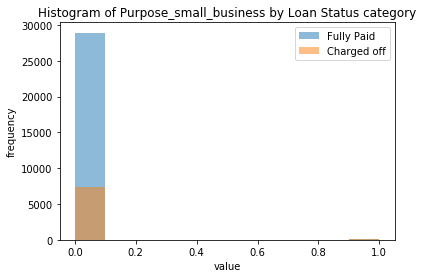

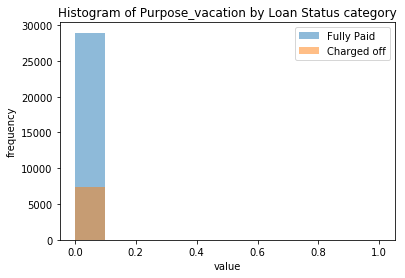

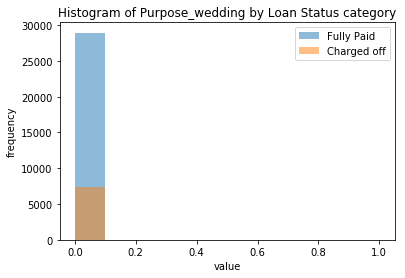

In [57]:
# Distribution of features : Histograms broken up by outcome categories (in this case Loan Status)
def plot_histogram(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Fully Paid')
    plt.hist(list(x[y==1]), alpha=0.5, label='Charged off')
    plt.title('Histogram of {0} by Loan Status category'.format(x.name))
    plt.xlabel("value")
    plt.ylabel("frequency")
    plt.legend(loc='upper right')
    plt.show()
    
for x in df.columns:
    plot_histogram(df[x],df["Loan Status"])

In [58]:
corr_abs = abs(df.corr())
corr_abs[['Loan Status']].sort_values(by='Loan Status',ascending=False)

,Loan Status
Loan Status,1.000000
Current Loan Amount,0.200122
Credit Ration per Year,0.175034
Credit Score,0.107797
Term,0.105298
Monthly Income,0.067501
Annual Income,0.059817
Home Ownership_Home Mortgage,0.051380
Home Ownership_Rent,0.047621
Years of Credit History,0.030938


In [59]:
df.head(10)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.0,99999999.0,1.0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,217646.0,1.0,730.0,1184194.0,0.0,10855.08,19.6,10.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,548746.0,1.0,678.0,2559110.0,2.0,18660.28,22.6,33.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,99999999.0,1.0,728.0,714628.0,3.0,11851.06,16.0,76.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,99999999.0,1.0,740.0,776188.0,0.0,11578.22,8.5,25.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,234124.0,1.0,727.0,693234.0,10.0,14211.24,24.7,46.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,666204.0,0.0,723.0,1821967.0,10.0,17612.24,22.0,34.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,317108.0,0.0,687.0,1133274.0,8.0,9632.81,17.4,53.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,465410.0,0.0,688.0,1722654.0,3.0,15647.45,22.3,30.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,99999999.0,1.0,746.0,1749748.0,10.0,19247.19,20.0,32.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
X_pca = pd.DataFrame(pca.fit_transform(df))

In [61]:
X_pca.head(10)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,8.622449e+07,9.941803e+04,7.306387e+05,67485.975620,-7766.870071,-20.222405,-6.941773,-37.178266,-5.777783,5.093862,...,0.001579,-0.000804,0.001595,-0.002722,0.002399,0.001272,0.000418,8.492539e-08,-2.354741e-07,-3.191759e-08
1,-1.355825e+07,-3.980558e+05,-2.868349e+05,100966.133995,7479.428319,-14.344343,-26.706810,-1.279304,0.259813,3.060827,...,0.002173,0.003438,-0.000180,0.001565,-0.000594,-0.001095,0.000105,3.401712e-08,-3.434948e-08,1.298461e-08
2,-1.322659e+07,-9.956889e+04,1.118057e+06,-33000.715654,12653.875485,35.661783,2.597711,3.311120,2.215107,-6.614608,...,-0.007990,-0.002222,-0.000911,0.000149,-0.000800,-0.000244,-0.000256,-6.548100e-08,3.298952e-08,6.308713e-08
3,8.622391e+07,-3.755831e+05,-7.853911e+05,-37055.617353,2869.629415,-6.434508,39.101347,49.533514,-1.569562,5.731791,...,0.001444,-0.005209,-0.000403,-0.001353,-0.001160,-0.002609,0.000036,-3.518560e-08,-3.940742e-08,6.432644e-09
4,8.622393e+07,-4.452295e+05,-7.323161e+05,39585.876194,2663.272617,-14.421572,-12.547685,39.580881,-10.494961,-3.878289,...,0.007584,0.001657,0.002178,-0.001681,-0.002246,-0.002183,0.000510,-6.781362e-08,-5.641085e-08,5.121774e-07
5,-1.354197e+07,-5.684045e+05,-7.859454e+05,129651.923729,-2745.860891,-15.869801,8.677181,-3.235766,7.260190,-1.301155,...,-0.000139,-0.001196,-0.002797,0.000202,0.000815,0.000012,-0.000189,3.910444e-08,-2.424756e-08,-1.154080e-09
6,-1.310952e+07,1.346669e+06,4.177273e+05,-489185.042394,13905.958129,-9.178639,-1.295363,1.137133,1.552126,2.996508,...,0.002526,0.002577,0.000624,0.000054,0.000150,0.000398,-0.000077,2.735379e-08,-3.653577e-08,3.108094e-08
7,-1.345880e+07,-5.441886e+05,-3.438790e+05,154670.701496,7825.092071,25.468206,19.431450,-2.883841,0.214334,-5.727172,...,-0.003069,-0.002311,-0.001365,0.000515,-0.000328,0.001623,0.000066,-5.199219e-09,7.885561e-09,1.315483e-09
8,-1.331029e+07,-1.769669e+05,2.445135e+05,186126.299233,4869.142355,25.286668,-2.507268,0.134958,3.560561,-3.376199,...,-0.010050,-0.031752,-0.002512,-0.013249,-0.003792,-0.005139,-0.001074,-9.380460e-10,-3.376094e-09,1.257843e-09
9,8.622433e+07,-3.604804e+05,2.467649e+05,75272.203984,1221.550417,-23.259385,-5.307660,-27.768783,0.534467,5.240645,...,0.001906,-0.000366,0.001416,0.000092,-0.000123,0.000069,0.000027,-1.698205e-08,2.800640e-08,1.322944e-09


In [62]:
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 37 columns):
0     36423 non-null float64
1     36423 non-null float64
2     36423 non-null float64
3     36423 non-null float64
4     36423 non-null float64
5     36423 non-null float64
6     36423 non-null float64
7     36423 non-null float64
8     36423 non-null float64
9     36423 non-null float64
10    36423 non-null float64
11    36423 non-null float64
12    36423 non-null float64
13    36423 non-null float64
14    36423 non-null float64
15    36423 non-null float64
16    36423 non-null float64
17    36423 non-null float64
18    36423 non-null float64
19    36423 non-null float64
20    36423 non-null float64
21    36423 non-null float64
22    36423 non-null float64
23    36423 non-null float64
24    36423 non-null float64
25    36423 non-null float64
26    36423 non-null float64
27    36423 non-null float64
28    36423 non-null float64
29    36423 non-null float64
30    36423 non-null 

In [63]:
df["index"] = df.index

In [64]:
import featuretools as ft

df = df.loc[:,~df.columns.duplicated()]

es = ft.EntitySet("values_first")
from featuretools import variable_types as vtypes

es.entity_from_dataframe(entity_id="values_first",
                         dataframe=df, index="index")



Entityset: values_first
  Entities:
    values_first [Rows: 36423, Columns: 38]
  Relationships:
    No relationships

In [65]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100

primitives[primitives['type'] == 'transform']

,name,type,description
20,not_equal,transform,Determines if values in one list are not equal to another list.
21,hour,transform,Determines the hour value of a datetime.
22,equal_scalar,transform,Determines if values in a list are equal to a given scalar.
23,haversine,transform,Calculates the approximate haversine distance between two LatLong
24,modulo_numeric_scalar,transform,Return the modulo of each element in the list by a scalar.
25,cum_sum,transform,Calculates the cumulative sum.
26,second,transform,Determines the seconds value of a datetime.
27,greater_than,transform,Determines if values in one list are greater than another list.
28,time_since,transform,Calculates time in nanoseconds from a value to a specified cutoff datetime.
29,longitude,transform,Returns the second tuple value in a list of LatLong tuples.


In [66]:
# use mutiply, add, divide, substract, 
default_trans_primitives =  ["multiply_numeric","add_numeric", "divide_numeric", "subtract_numeric", "less_than_scalar"]

In [67]:
# DFS with specified primitives
feature_matrix, features = ft.dfs(entityset = es, target_entity = 'values_first',
                       trans_primitives = default_trans_primitives,
                       where_primitives = [], seed_features = [],
                       n_jobs = 1, verbose = 1,
                       max_depth = 1, features_only=False)  #set max_depth = 1

Built 3404 features
Elapsed: 00:48 | Remaining: 00:00 | Progress: 100%|██████████████████████████████████████████| Calculated: 11/11 chunks


In [68]:
fm_encoded, features_encoded = ft.encode_features(feature_matrix,
                                                  features)
fm_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 0 to 36422
Columns: 3404 entries, Loan Status to Purpose_wedding < 0
dtypes: bool(37), float64(3367)
memory usage: 937.2 MB


In [69]:
df["Loan Status"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        1.0
8        0.0
9        0.0
10       0.0
11       1.0
12       0.0
13       0.0
14       0.0
15       1.0
16       1.0
17       0.0
18       1.0
19       0.0
20       0.0
21       1.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
36393    1.0
36394    0.0
36395    0.0
36396    0.0
36397    1.0
36398    0.0
36399    0.0
36400    0.0
36401    0.0
36402    0.0
36403    0.0
36404    0.0
36405    0.0
36406    1.0
36407    0.0
36408    0.0
36409    0.0
36410    0.0
36411    0.0
36412    0.0
36413    0.0
36414    1.0
36415    1.0
36416    0.0
36417    0.0
36418    0.0
36419    0.0
36420    0.0
36421    0.0
36422    0.0
Name: Loan Status, Length: 36423, dtype: float64

In [70]:
fm_encoded['Loan Status']=df['Loan Status']

In [71]:
for col in fm_encoded.columns:
    if fm_encoded[col].dtype != np.float64:
        fm_encoded[col] = fm_encoded[col].astype(np.float64)

In [74]:
fm_encoded.head(2)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Purpose_Medical Bills < 0,Purpose_Other < 0,Purpose_Take a Trip < 0,Purpose_major_purchase < 0,Purpose_moving < 0,Purpose_other < 0,Purpose_renewable_energy < 0,Purpose_small_business < 0,Purpose_vacation < 0,Purpose_wedding < 0
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,99999999.0,1.0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,217646.0,1.0,730.0,1184194.0,0.0,10855.08,19.6,10.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
#absolute correlation matrix sorted with descending order
corr_abs = abs(fm_encoded.corr())
corr_abs[['Loan Staus']].sort_values(by='Loan Status',ascending=False)

KeyError: "None of [Index(['Loan Staus'], dtype='object')] are in the [columns]"